In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Read in Data

In [2]:
matrix_data = pd.read_csv("PROKKA.matrix.data", names=['Gene Count', 'Phage 1', 'Phage 2'], sep=",")

In [3]:
unique_genome = matrix_data['Phage 1'].unique().tolist()

In [4]:
len(matrix_data)

36481

## Generate A Pairwise Count Matrix

To do so, our strategy is the following:

1. Get all the unique phages
1. We get all the unique values of phages, and the corresponding array of counts
1. Get a pandas series 
1. Create a numpy matrix from the obtained series (should be size 190x190)

In [5]:
phage_list = matrix_data['Phage 1'].unique()
print(f"Number of unique phages: {len(phage_list)}")

Number of unique phages: 191


Now moving on to getting the pairwise counts:

In [6]:
# you want to get all the unique Phage 1 values, and the corresponding gene counts for every other phage, including itself
# here with group by we get, and now we want to get all the values as a list
c_matrix = matrix_data.groupby('Phage 1')['Gene Count'].apply(list)

In [7]:
type(c_matrix)

pandas.core.series.Series

above will result in a pandas series. Now to finally get what we need, we need to turn into an array, but first let's check the type:

In [8]:
# c_matrix.tolist()
numpy_matrix = np.asarray(c_matrix.tolist())

Now let's check out the matrix we got:

In [9]:
print(numpy_matrix)
print(f"\n Matrix has the shape: {numpy_matrix.shape}")

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

 Matrix has the shape: (191, 191)


In [10]:
np.savetxt("prokka_matrix.csv", numpy_matrix, delimiter=",")

which is exactly what we wanted! 

## Make a Dataframe with the Count Matrix

In [11]:
pairwise_count = pd.DataFrame(data = numpy_matrix)

In [12]:
pairwise_count.columns = list(phage_list)

In [13]:
pairwise_count.index = list(phage_list)

In [14]:
pairwise_count

GCA_000009005.1_ASM900v1_genomic.gbff_pp10.ffn  \
 GCA_000009005.1_ASM900v1_genomic.gbff_pp10.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp11.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp12.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp13.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp14.ffn                                                 0   
...                                                                                           ...   
 GCA_900251565.1_M3684_genomic.gbff_pp14.ffn                                                    0   
 GCA_900251895.1_M3925_genomic.gbff_pp17.ffn                                                    0   
 GCA_900251895.1_M3925_genomic.gbff_pp18.ffn                                                    0   
 GCA_900323905.1_24117-WT_genomic.gbff_pp6.ffn                                                  0   
 GCA_900482705.1_7915_6_43_genomic.gbff_pp16.ffn                                                0   

                                                   GCA_000009005.1_ASM900v1_genomic.gbff_pp11.ffn  \
 GCA_000009005.1_ASM900v1_genomic.gbff_pp10.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp11.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp12.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp13.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp14.ffn                                                 0   
...                                                                                           ...   
 GCA_900251565.1_M3684_genomic.gbff_pp14.ffn                                                    0   
 GCA_900251895.1_M3925_genomic.gbff_pp17.ffn                                                    0   
 GCA_900251895.1_M3925_genomic.gbff_pp18.ffn                                                    0   
 GCA_900323905.1_24117-WT_genomic.gbff_pp6.ffn                                                  0   
 GCA_900482705.1_7915_6_43_genomic.gbff_pp16.ffn                                                0   

                                                   GCA_000009005.1_ASM900v1_genomic.gbff_pp12.ffn  \
 GCA_000009005.1_ASM900v1_genomic.gbff_pp10.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp11.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp12.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp13.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp14.ffn                                                 0   
...                                                                                           ...   
 GCA_900251565.1_M3684_genomic.gbff_pp14.ffn                                                    0   
 GCA_900251895.1_M3925_genomic.gbff_pp17.ffn                                                    0   
 GCA_900251895.1_M3925_genomic.gbff_pp18.ffn                                                    0   
 GCA_900323905.1_24117-WT_genomic.gbff_pp6.ffn                                                  0   
 GCA_900482705.1_7915_6_43_genomic.gbff_pp16.ffn                                                0   

                                                   GCA_000009005.1_ASM900v1_genomic.gbff_pp13.ffn  \
 GCA_000009005.1_ASM900v1_genomic.gbff_pp10.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp11.ffn                                                 0   
 GCA_000009005.1_ASM900v1_genomic.gbff_pp12.ffn                                                 0   
 GCA_000

### Example of plotting heatmaps for this dataframe we generated

I think the best way to visualize this data now is to do a heatmap, and pandas provides a very nice way of doing this with the actual numbers in them. Here is how:

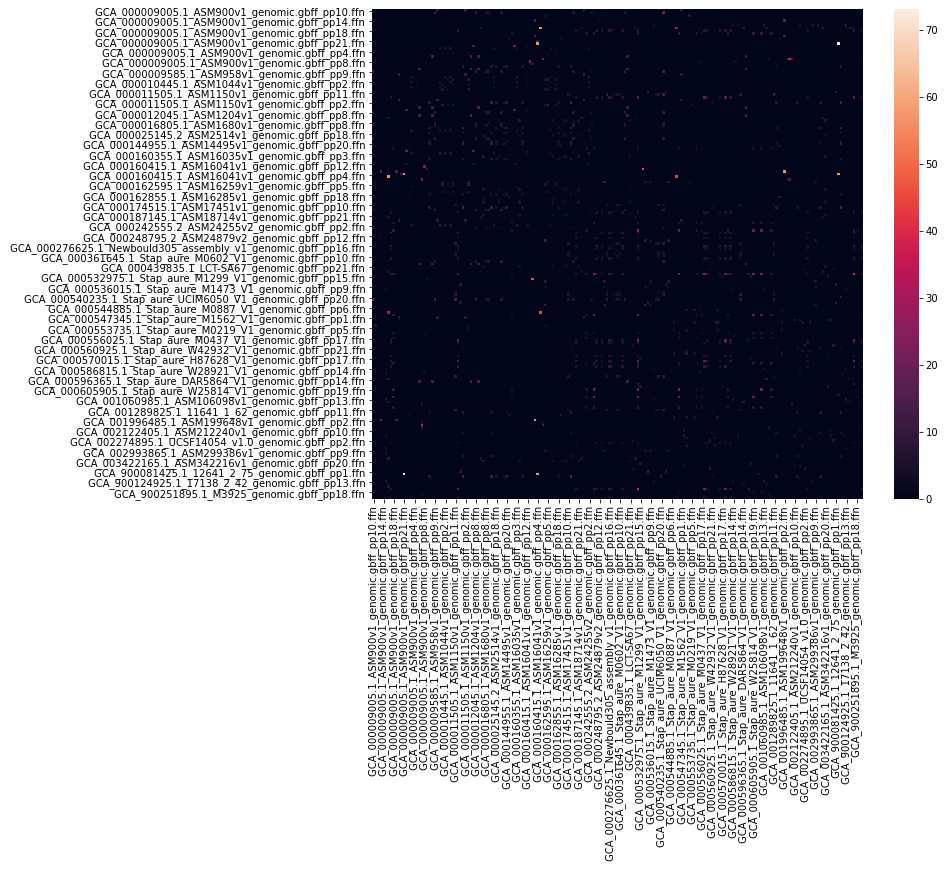

In [18]:
fig, ax = plt.subplots(figsize=(11, 9))
sns_plot2 = sns.heatmap(pairwise_count)
sns_plot2.figure.savefig("output3.png")

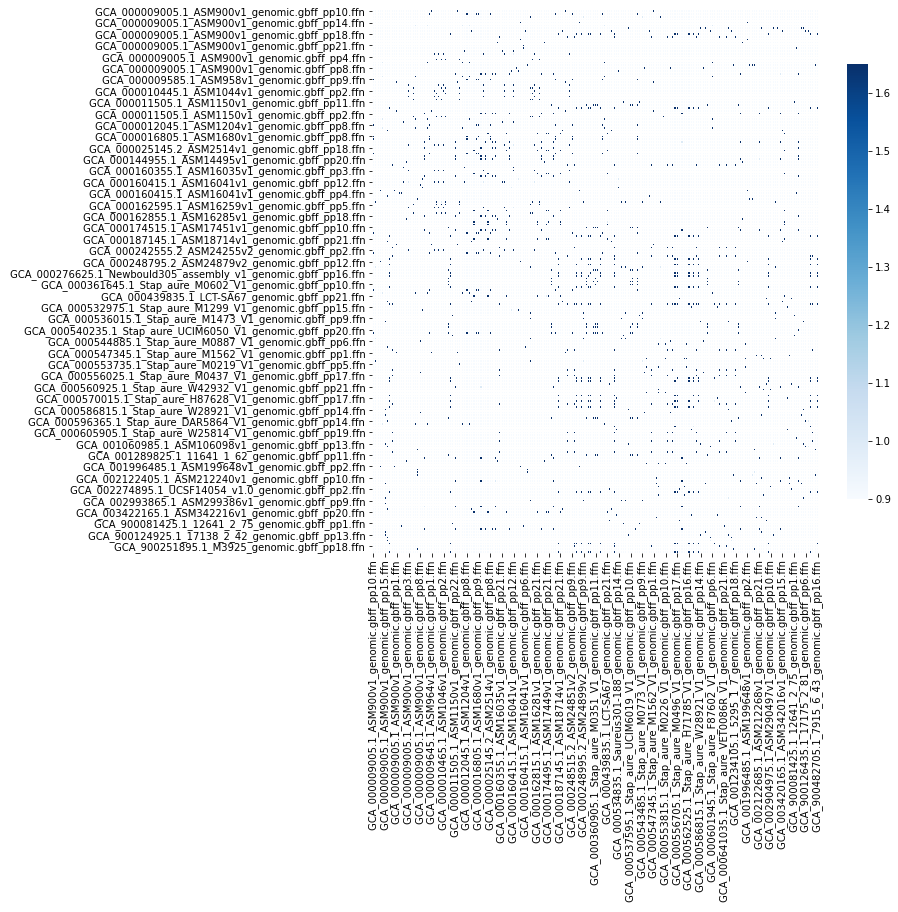

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
# plot heatmap
sns_plot = sns.heatmap(pairwise_count, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
sns_plot.figure.savefig("output5.png")

In [16]:
pairwise_count.style.background_gradient(cmap='Blues')

## Optional
### Example of getting lower and upper triangular of a matrix 

In [17]:
A = np.array([[2,3,4], [3,45,8], [34,7,0.8], [21,31,41]])

print(f'A : \n {A}')
print(f'A^T is : \n {A.T}')

S = np.matmul(A,A.T)

print(f'Symmetric Matrix 1: \n {S}')

A : 
 [[ 2.   3.   4. ]
 [ 3.  45.   8. ]
 [34.   7.   0.8]
 [21.  31.  41. ]]
A^T is : 
 [[ 2.   3.  34.  21. ]
 [ 3.  45.   7.  31. ]
 [ 4.   8.   0.8 41. ]]
Symmetric Matrix 1: 
 [[  29.    173.     92.2   299.  ]
 [ 173.   2098.    423.4  1786.  ]
 [  92.2   423.4  1205.64  963.8 ]
 [ 299.   1786.    963.8  3083.  ]]


In [19]:
symmetry = pd.DataFrame(data = S)

In [20]:
symmetry.style.background_gradient(cmap='Blues')

Now extract upper and lower tringulars:

In [18]:
upper = np.triu(S)
upper

array([[  29.  ,  173.  ,   92.2 ,  299.  ],
       [   0.  , 2098.  ,  423.4 , 1786.  ],
       [   0.  ,    0.  , 1205.64,  963.8 ],
       [   0.  ,    0.  ,    0.  , 3083.  ]])

In [19]:
lower = np.tril(S)
lower

array([[  29.  ,    0.  ,    0.  ,    0.  ],
       [ 173.  , 2098.  ,    0.  ,    0.  ],
       [  92.2 ,  423.4 , 1205.64,    0.  ],
       [ 299.  , 1786.  ,  963.8 , 3083.  ]])